In [1]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

In [2]:
import numpy as np

In [3]:
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

idx = np.arange(100)
np.random.shuffle(idx)

train_idx = idx[:80]
val_idx = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


In [4]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# .type() from torch tells us about the device "cuda - cpu"
print(type(x_train),type(x_train_tensor),x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [64]:
#gpu tensors can't be directly transformed into numpy array, you have to convert it to cpu first
# x_train_tensor.numpy() #  TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [6]:
type(x_train_tensor.to('cpu').numpy())

numpy.ndarray

In [7]:
#set requires_grad to true so torch can know that these are trainable parameters
#that will need their gradient calculated later on
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)

#if we want it to run on a gpu, we can't do that in the following manner:
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(a, b)

#instead we can do that:
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)
#every method that ends with underscore _ in torch means that it'll modify the original variable
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([-0.3694], requires_grad=True) tensor([0.0176], requires_grad=True)
tensor([0.8542], requires_grad=True) tensor([-1.0637], requires_grad=True)
tensor([0.3116], requires_grad=True) tensor([0.8318], requires_grad=True)


In [8]:
#we can specify the device at the moment of creation which is recommended
torch.manual_seed(42) #same as np.random.seed but for torch distributions
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [9]:
lr = 1e-1
n_epochs = 1000

for _ in range(n_epochs):
  yhat = a + b * x_train_tensor
  error = y_train_tensor - yhat
  loss = (error**2).mean()
  loss.backward()
  # printing the computed gradient in each step
  print(a.grad)
  print(b.grad)
  # no_grad is a context manager that disables the gradient computation, we use it when we are done with gradient computation
  # and we are sure that we won't use backward again which is our case it does that by setting requires_grad = False to the results even if the input has requires_grad = True
  # which will reduce memory consumption
  with torch.no_grad():
    a -= lr * a.grad
    print((a - lr * a.grad).requires_grad)
    b -= lr * b.grad
  a.grad.zero_()
  b.grad.zero_()
print(a,b)

tensor([-3.1125])
tensor([-1.8156])
False
tensor([-2.3184])
tensor([-1.4064])
False
tensor([-1.7219])
tensor([-1.0982])
False
tensor([-1.2737])
tensor([-0.8659])
False
tensor([-0.9372])
tensor([-0.6906])
False
tensor([-0.6845])
tensor([-0.5583])
False
tensor([-0.4948])
tensor([-0.4582])
False
tensor([-0.3526])
tensor([-0.3824])
False
tensor([-0.2459])
tensor([-0.3248])
False
tensor([-0.1660])
tensor([-0.2810])
False
tensor([-0.1063])
tensor([-0.2475])
False
tensor([-0.0616])
tensor([-0.2218])
False
tensor([-0.0283])
tensor([-0.2019])
False
tensor([-0.0036])
tensor([-0.1864])
False
tensor([0.0147])
tensor([-0.1743])
False
tensor([0.0283])
tensor([-0.1646])
False
tensor([0.0382])
tensor([-0.1568])
False
tensor([0.0453])
tensor([-0.1505])
False
tensor([0.0505])
tensor([-0.1452])
False
tensor([0.0541])
tensor([-0.1408])
False
tensor([0.0566])
tensor([-0.1370])
False
tensor([0.0582])
tensor([-0.1337])
False
tensor([0.0592])
tensor([-0.1307])
False
tensor([0.0597])
tensor([-0.1280])
False
te

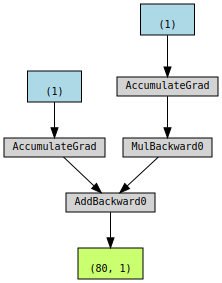

In [10]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()
make_dot(yhat)

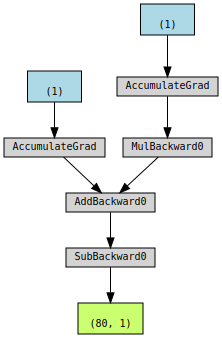

In [11]:
make_dot(error)

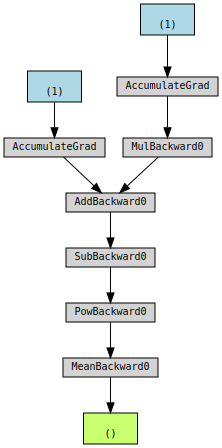

In [12]:
make_dot(loss)

In [20]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

#instead of calculating the loss manually and do the gradient descent, we can use torch optimizers and nn.Loss

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD([a,b],lr=lr)

for _ in range(n_epochs):
  yhat = a + b * x_train_tensor
  # no calculating loss manually anymore!
  loss = loss_fn(y_train_tensor,yhat)
  loss.backward()
  optimizer.step() # triger the sgd optimizer
  optimizer.zero_grad() # needless to use no_grad context manager

print(a,b) #same results with more compact code

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [22]:
# we have done the loss and optimization using torch, now we still want to calculate predictions
# which can be done by inherting nn.Module
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Parameter so torch can know that these parameters are associated to this class
    self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self,x):
    return self.a + self.b * x

In [26]:
torch.manual_seed(42)

# the model should be sent to the same device of the data
model = LinearRegression().to(device)

# list all class parameters which is better than printing manually since we can have millions of parameters
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
# notice how we pass the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

for _ in range(n_epochs):
    model.train() # set model in training mode
    yhat = model(x_train_tensor) # no more (a + b * x_train_tensor)
    loss = loss_fn(y_train_tensor, yhat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(model.state_dict())

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288]))])
OrderedDict([('a', tensor([1.0235])), ('b', tensor([1.9690]))])


In [27]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # instead of custom parameters, we use a linear layer with single input and single output
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [30]:
[*LinearRegression().parameters()]

[Parameter containing:
 tensor([[0.8815]], requires_grad=True),
 Parameter containing:
 tensor([-0.7336], requires_grad=True)]

In [49]:
torch.manual_seed(42)

model = LinearRegression().to(device)

print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for _ in range(n_epochs):
    model.train()
    yhat = model(x_train_tensor)
    loss = loss_fn(y_train_tensor, yhat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(model.state_dict())

OrderedDict([('linear.weight', tensor([[0.7645]])), ('linear.bias', tensor([0.8300]))])
OrderedDict([('linear.weight', tensor([[1.9690]])), ('linear.bias', tensor([1.0235]))])


In [35]:
# we can use pytorch sequential models if the model is simple enough which is similar to Sequential class in tensorflow
# torch.manual_seed(42)
# model = nn.Sequential(nn.Linear(1, 1)).to(device)
# model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]])), ('0.bias', tensor([0.8300]))])

In [54]:
# now we have achieved what we want, we have used pytorch's model,loss and optimizer, but there's a problem
# should we always change the code to use different loss function, optimizer etc? that's why we should create a function to make this process more generic

model = nn.Sequential(nn.Linear(1, 1)).to(device)

print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)


def make_train_step(model, loss_fn, optimizer):
    # builds function that performs a step in the train loop
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(y, yhat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()

    # returns the function that will be called inside the train loop
    return train_step

# creates the train_step function for our model, loss function and optimizer
train_step = make_train_step(model, loss_fn, optimizer)
losses = []

# performs one train step and returns the corresponding loss, look at the difference between the loop above and the loop now
# now the loop is more compact and the code in general is more generic
for _ in range(n_epochs):
    loss = train_step(x_train_tensor, y_train_tensor)
    losses.append(loss)


print(model.state_dict())

OrderedDict([('0.weight', tensor([[-0.4869]])), ('0.bias', tensor([0.5873]))])
OrderedDict([('0.weight', tensor([[1.9690]])), ('0.bias', tensor([1.0235]))])


In [55]:
# now it's time to use Dataset class to get more control on the data

from torch.utils.data import Dataset, TensorDataset

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor

    # return (feature,label)
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    # get dataset size
    def __len__(self):
        return len(self.x)

x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

# if the data is only couple of tensors (which is our case) we can use TensorDataset
train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

(tensor([0.7713]), tensor([2.4745]))
(tensor([0.7713]), tensor([2.4745]))


In [57]:
# so far we are using the whole training data at each step which applies full batch gradient descent
# most of the time our data will be big enough that will make loading the whole data into ram isn't viable
# so instead we can use DataLoader class which will help us to load the data in mini batches

from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)
# to return one batch of features and labels
next(iter(train_loader))

[tensor([[0.2809],
         [0.8287],
         [0.1560],
         [0.5613],
         [0.1960],
         [0.9869],
         [0.7081],
         [0.9489],
         [0.1409],
         [0.9699],
         [0.3117],
         [0.3585],
         [0.8872],
         [0.1159],
         [0.8084],
         [0.0206]]),
 tensor([[1.5846],
         [2.7388],
         [1.2901],
         [2.0472],
         [1.4393],
         [3.0520],
         [2.3660],
         [2.8903],
         [1.1211],
         [2.9727],
         [1.7637],
         [1.7462],
         [2.8708],
         [1.1603],
         [2.6141],
         [1.1327]])]

In [58]:
# we can use the dataloader with our training loop as following:

losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for _ in range(n_epochs):
    for x_batch, y_batch in train_loader:
      # now we can send the mini batches to the same device of the model
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        loss = train_step(x_batch, y_batch)
        losses.append(loss)

print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9685]])), ('0.bias', tensor([1.0236]))])


In [62]:
# we can use random_split from pytorch so we can split the data into training and validation/testing

from torch.utils.data.dataset import random_split

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [80, 20])

#notice that we are creating to dataloaders one for the train and one for eval
train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

In [63]:
# after we already have a dataloader to train and validation, now we can use validation loader to evaluate the model

losses = []
val_losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for _ in range(n_epochs):
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        loss = train_step(x_batch, y_batch)
        losses.append(loss)
    # it doesn't really do any difference here as we are evaluating, but we can use it as a best practice to disable gradient calculation
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            # set the model to evaluation mode as we did with model.train()
            model.eval()

            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())

print(model.state_dict())


OrderedDict([('0.weight', tensor([[1.9720]])), ('0.bias', tensor([1.0222]))])
